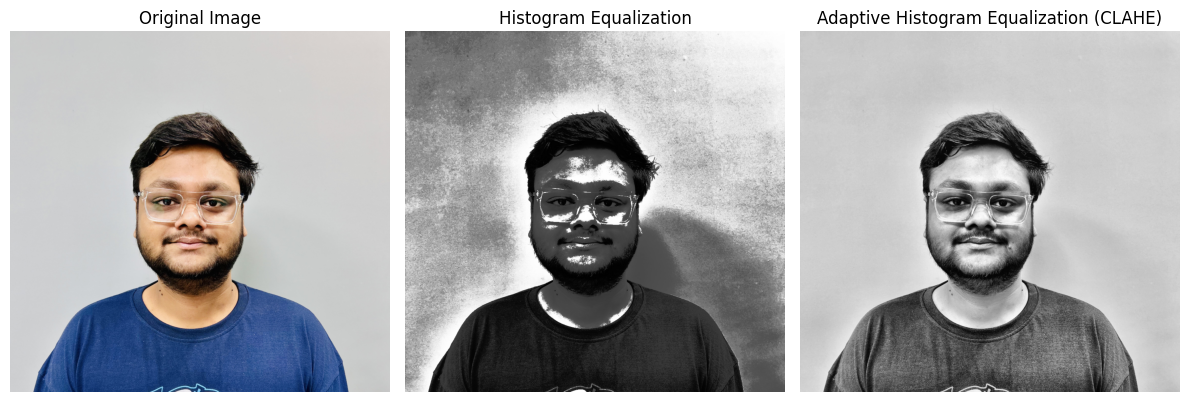

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    """Apply Histogram Equalization."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

def adaptive_histogram_equalization(image):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gray_image)
    return cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR)

# Load the original image
image = cv2.imread('../test_soubhik.png')  # Make sure to use your image path

# Apply the processing functions
equalized_image = histogram_equalization(image)
clahe_image = adaptive_histogram_equalization(image)

# Display the comparison using Matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Histogram Equalization
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title("Histogram Equalization")
plt.axis('off')

# Adaptive Histogram Equalization (CLAHE)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(clahe_image, cv2.COLOR_BGR2RGB))
plt.title("Adaptive Histogram Equalization (CLAHE)")
plt.axis('off')

plt.tight_layout()
plt.show()


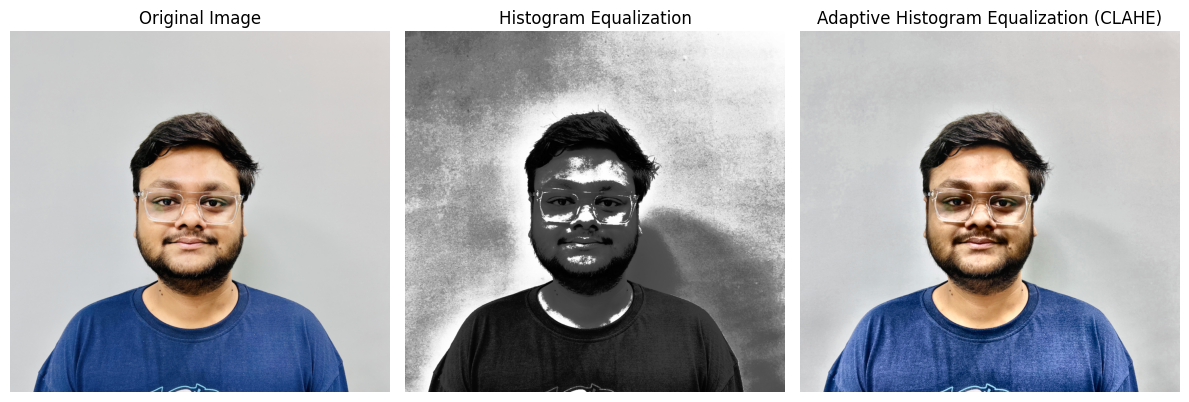

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    """Apply Histogram Equalization."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

def adaptive_histogram_equalization(image):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) in Lab color space."""
    # Convert image to Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split the Lab image into L (Luminance), A, and B channels
    l, a, b = cv2.split(lab_image)
    
    # Apply CLAHE to the L channel (Luminance)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # Merge the enhanced L channel with the original A and B channels
    enhanced_lab_image = cv2.merge((cl, a, b))
    
    # Convert the enhanced Lab image back to BGR
    return cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

# Load the original image
image = cv2.imread('../test_soubhik.png')  # Make sure to use your image path

# Apply the processing functions
equalized_image = histogram_equalization(image)
clahe_image = adaptive_histogram_equalization(image)

# Display the comparison using Matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Histogram Equalization
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title("Histogram Equalization")
plt.axis('off')

# Adaptive Histogram Equalization (CLAHE)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(clahe_image, cv2.COLOR_BGR2RGB))
plt.title("Adaptive Histogram Equalization (CLAHE)")
plt.axis('off')

plt.tight_layout()
plt.show()
